In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import pandas which is a library and it contains the functions related to the database

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
#read the excel sheet using read_csv and store in a variable 'dataset'

In [3]:
dataset
#run the variable and verify the excel datas are fetched and stored in the variable

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:,[3,4]].values#[3,4] means, 3rd and 4th column
#Eg to cover first 5 rows and column 1 to  is "dataset.iloc[0:5,1:4]].values"
#Training set and Test set is available in Supervised learning
#But only Training set is available in Unsupervised Learning
#independent=dataset[["YearsExperience"]]

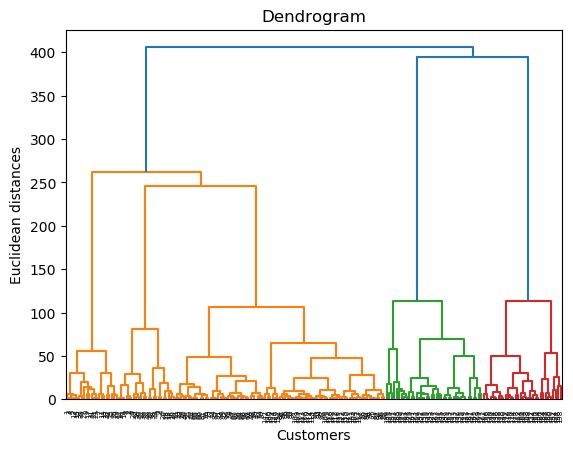

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')                
plt.xlabel('Customers')            
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
clusmodel = AgglomerativeClustering(n_clusters = 5)
label = clusmodel.fit_predict(X)

C:\Users\subi\.conda\envs\aiml\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [10]:
supervised = pd.DataFrame(dataset)#Convert particular dataset into supervised learning

In [11]:
supervised['Cluster_Group']=label#adding a column "Cluster_Group" to existing predicted table "label"

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


C:\Users\subi\.conda\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


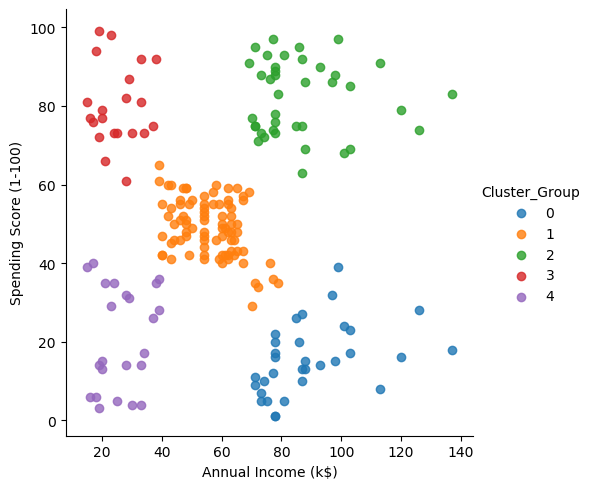

In [14]:
import seaborn as sns #seaborn is used to draw graphs
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)#hue is used to give colors

In [15]:
#!pip install seaborn